# Projet 9:  Produisez une étude de marché (partie 2)

## 1 Importation des packages

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Packages de visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Packages pour centrer et réduire les données 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Packages de clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage

## 2. Imporation du fichier csv 

In [2]:
df = pd.read_csv('csv.dff_17.csv', decimal=".", index_col=0) # Je mets les pays en index
df.head()

,Année,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Nombre Habitant,Evolution_pop %,Balance commerciale
Pays,,,,,,,,,,,,,
Afghanistan,2017,5.0,1.53,0.33,0.54,57.0,0.0,29.0,55.0,28.0,36296113,2.58,-29.0
Afrique du Sud,2017,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0,57009756,1.43,-451.0
Albanie,2017,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0,2884169,-0.08,-38.0
Algérie,2017,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,41389189,2.07,-2.0
Allemagne,2017,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0,82658409,0.57,-196.0


In [3]:
# Je supprime la varible 'Année'
df = df.drop('Année', axis=1)

In [4]:
# je renomme les variables
df = df.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)':'Dispo al Kcal/per/j',
                            'Disponibilité alimentaire en quantité (kg/personne/an)':'Dispo al kg/per/an',
                            'Disponibilité de matière grasse en quantité (g/personne/jour)':'Dispo mat grass g/per/j',
                            'Disponibilité de protéines en quantité (g/personne/jour)':'Dispo pro g/per/j',
                            'Disponibilité intérieure':'Dispo intér T',
                            'Exportations - Quantité':'Expor T',
                            'Importations - Quantité':'Impor T'})

In [5]:
df.shape

(167, 12)

In [6]:
df.describe()

,Dispo al Kcal/per/j,Dispo al kg/per/an,Dispo mat grass g/per/j,Dispo pro g/per/j,Dispo intér T,Expor T,Impor T,Nourriture,Production,Nombre Habitant,Evolution_pop %,Balance commerciale
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02,167.000000,167.000000
mean,75.622754,20.507485,4.968623,7.221976,690.437126,103.856287,88.017964,659.898204,719.053892,4.349453e+07,1.251138,15.838323
std,60.916753,15.948159,4.219083,5.631898,2204.524295,463.610351,185.329289,2153.616626,2507.711637,1.552449e+08,1.119148,472.798530
min,0.000000,0.130000,0.030000,0.040000,2.000000,0.000000,0.000000,2.000000,0.000000,5.204500e+04,-1.530000,-1059.000000
25%,22.000000,6.760000,1.495000,2.245000,32.000000,0.000000,3.000000,30.000000,13.500000,2.902508e+06,0.445000,-38.000000
50%,65.000000,18.270000,3.760000,6.650000,102.000000,0.000000,16.000000,101.000000,69.000000,9.785843e+06,1.170000,-9.000000
75%,108.000000,30.335000,6.835000,10.515000,364.500000,12.000000,80.500000,359.500000,376.500000,2.960962e+07,2.095000,0.000000
max,243.000000,72.310000,17.860000,27.870000,18266.000000,4223.000000,1069.000000,18100.000000,21914.000000,1.421022e+09,4.170000,4220.000000


In [7]:
# Je sépare mes données 
X = df.values
X[:6]

array([[ 5.0000000e+00,  1.5300000e+00,  3.3000000e-01,  5.4000000e-01,
         5.7000000e+01,  0.0000000e+00,  2.9000000e+01,  5.5000000e+01,
         2.8000000e+01,  3.6296113e+07,  2.5800000e+00, -2.9000000e+01],
       [ 1.4300000e+02,  3.5690000e+01,  9.2500000e+00,  1.4110000e+01,
         2.1180000e+03,  6.3000000e+01,  5.1400000e+02,  2.0350000e+03,
         1.6670000e+03,  5.7009756e+07,  1.4300000e+00, -4.5100000e+02],
       [ 8.5000000e+01,  1.6360000e+01,  6.4500000e+00,  6.2600000e+00,
         4.7000000e+01,  0.0000000e+00,  3.8000000e+01,  4.7000000e+01,
         1.3000000e+01,  2.8841690e+06, -8.0000000e-02, -3.8000000e+01],
       [ 2.2000000e+01,  6.3800000e+00,  1.5000000e+00,  1.9700000e+00,
         2.7700000e+02,  0.0000000e+00,  2.0000000e+00,  2.6400000e+02,
         2.7500000e+02,  4.1389189e+07,  2.0700000e+00, -2.0000000e+00],
       [ 7.1000000e+01,  1.9470000e+01,  4.1600000e+00,  7.9600000e+00,
         1.7390000e+03,  6.4600000e+02,  8.4200000e+02,  1.6

In [8]:
type(X)

numpy.ndarray

In [9]:
X.shape

(167, 12)

In [10]:
pays = df.index
pays

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Turkménistan', 'Turquie', 'Ukraine', 'Uruguay', 'Vanuatu',
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe'],
      dtype='object', name='Pays', length=167)

In [11]:
colonne = df.columns
colonne

Index(['Dispo al Kcal/per/j', 'Dispo al kg/per/an', 'Dispo mat grass g/per/j',
       'Dispo pro g/per/j', 'Dispo intér T', 'Expor T', 'Impor T',
       'Nourriture', 'Production', 'Nombre Habitant', 'Evolution_pop %',
       'Balance commerciale'],
      dtype='object')

## 3. ACP

In [12]:
# J'instancie le Scaler aux données
scaler = StandardScaler() # Permets de standartiser les données (ramène les données entre -1 et 1)

In [13]:
# J'ajuste le Scaler aux données, Je fit (ajuste) les données separées (centrage)
scaler.fit(X)

StandardScaler()

In [14]:
# Je transforme les données (réduction)
X_scaled = scaler.transform(X)
X_scaled

array([[-1.16281894, -1.1935271 , -1.1027452 , ..., -0.04650757,
         1.19095805, -0.09512123],
       [ 1.10938093,  0.95485482,  1.01781681, ...,  0.08731929,
         0.16030063, -0.99036338],
       [ 0.15439838, -0.26084256,  0.35216954, ..., -0.26237571,
        -1.19299736, -0.11421407],
       ...,
       [-0.75118853, -0.7532849 , -0.74139383, ..., -0.10117436,
         1.07444895, -0.19907114],
       [-1.06402764, -1.0746617 , -1.01003005, ..., -0.17212191,
         1.56737206, -0.05693554],
       [-0.98170156, -0.99541811, -0.94584263, ..., -0.18902987,
         0.19614959, -0.04632841]])

In [15]:
# Je vérifie si la moyenne est bien à 0 et l'écart type à 1
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11
mean,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
# J'instancie
pca = PCA()

In [17]:
pca.fit(X_scaled)

PCA()

In [18]:
# Je calcule la variance captée par chaque nouvelle composante en affichant le ratio
pca.explained_variance_ratio_

array([4.39276436e-01, 2.88481519e-01, 1.14623595e-01, 6.75678728e-02,
       6.44316406e-02, 1.86854437e-02, 6.12598955e-03, 6.64904742e-04,
       1.10154397e-04, 3.07472923e-05, 1.69710542e-06, 9.07831015e-33])

In [19]:
# J'enregistre le tout dans une variable 
variance = (pca.explained_variance_ratio_ * 100).round(2)
variance

array([4.393e+01, 2.885e+01, 1.146e+01, 6.760e+00, 6.440e+00, 1.870e+00,
       6.100e-01, 7.000e-02, 1.000e-02, 0.000e+00, 0.000e+00, 0.000e+00])

In [20]:
# Je l'affiche en %
variance_prcentage = ["{:.2f}%".format(percentage) for percentage in variance]
variance_prcentage

['43.93%',
 '28.85%',
 '11.46%',
 '6.76%',
 '6.44%',
 '1.87%',
 '0.61%',
 '0.07%',
 '0.01%',
 '0.00%',
 '0.00%',
 '0.00%']

#### la 1ère composante capte 44% de la variance des données initiales, la 2ème 29%, la 3ème 11% etc. 

In [21]:
# Je calcule la somme cumulée
variance_prcentage_cum = variance.cumsum().round()
variance_prcentage_cum

array([ 44.,  73.,  84.,  91.,  97.,  99., 100., 100., 100., 100., 100.,
       100.])

In [22]:
# Je crée la liste des composantes
liste_composante = range(1, len(variance) + 1)
liste_composante

range(1, 13)

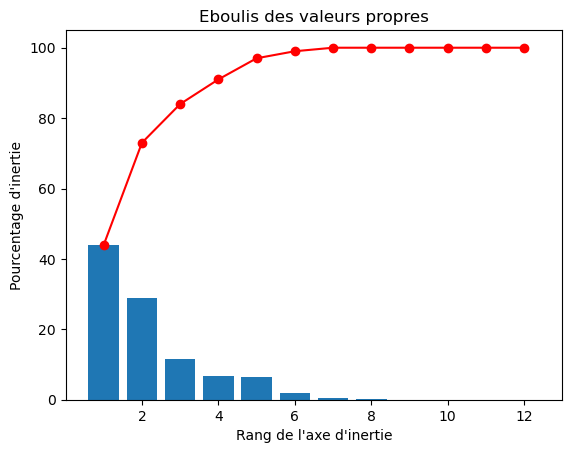

In [23]:
# J'affiche le graphique d'éboulis des valeurs propres
plt.bar(liste_composante, variance)
plt.plot(liste_composante, variance_prcentage_cum, c="red", marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

#### On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.  Plus de 80% de la variance est comprise dans les 3 premières composantes, et près de 100% dans les 5 premières.

#### En utilisant le méthode du coude, je fais le choix de choisir les 3 premières composantes.

In [24]:
# Je fais le choix de garder les 3 premières composantes uniquepment
n_components = 3

In [25]:
pca= PCA(n_components=n_components)

In [26]:
pca.fit(X_scaled)

PCA(n_components=3)

## 3.2  Analyse des composantes

In [27]:
#J'affiche les lignes où chaque ligne représente un vecteur 
composantes_r = pca.components_
composantes_r

array([[ 0.31128858,  0.30102791,  0.31074276,  0.29801975,  0.34887007,
         0.32831308,  0.11353351,  0.35111131,  0.35993071,  0.16873571,
        -0.16262529,  0.2774295 ],
       [-0.36787687, -0.37899291, -0.35116895, -0.3765865 ,  0.29283111,
         0.19442904, -0.01629053,  0.29019645,  0.29373653,  0.30524122,
         0.17200369,  0.1970362 ],
       [-0.00214069,  0.01011528, -0.02134875,  0.02627804,  0.14153658,
        -0.31578193,  0.62958348,  0.12836103,  0.02387409,  0.38367908,
        -0.09353261, -0.55643157]])

In [28]:
# J'affiche le resultat dans un df 
composantes_r = pd.DataFrame(composantes_r)
composantes_r

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.311289,0.301028,0.310743,0.298020,0.348870,0.328313,0.113534,0.351111,0.359931,0.168736,-0.162625,0.277429
1,-0.367877,-0.378993,-0.351169,-0.376587,0.292831,0.194429,-0.016291,0.290196,0.293737,0.305241,0.172004,0.197036
2,-0.002141,0.010115,-0.021349,0.026278,0.141537,-0.315782,0.629583,0.128361,0.023874,0.383679,-0.093533,-0.556432


In [29]:
composantes_r.columns = colonne
composantes_r.index = [f"F{i}" for i in liste_composante[:3]]
composantes_r.round(2)

,Dispo al Kcal/per/j,Dispo al kg/per/an,Dispo mat grass g/per/j,Dispo pro g/per/j,Dispo intér T,Expor T,Impor T,Nourriture,Production,Nombre Habitant,Evolution_pop %,Balance commerciale
F1,0.31,0.30,0.31,0.30,0.35,0.33,0.11,0.35,0.36,0.17,-0.16,0.28
F2,-0.37,-0.38,-0.35,-0.38,0.29,0.19,-0.02,0.29,0.29,0.31,0.17,0.20
F3,-0.00,0.01,-0.02,0.03,0.14,-0.32,0.63,0.13,0.02,0.38,-0.09,-0.56


####  F1, F2, F3  sont des combinaisons linéaires des variables initiale c'est à dire : 
####  F1 = (0.31 * Disponibilité alimentaire) + (0.30 * Dispo matière grasse) + ... + (0.28 * Balance commerciale)
####  F2 = (-0.37 * Disponibilité alimentaire) + (-0.38 * Dispo matière grasse) + ... + (0.20 * Balance commerciale)
####  F3 = (-0.00 * Disponibilité alimentaire) + (0.01 * Dispo matière grasse) + ... + (-0.56 * Balance commerciale)

<AxesSubplot:>

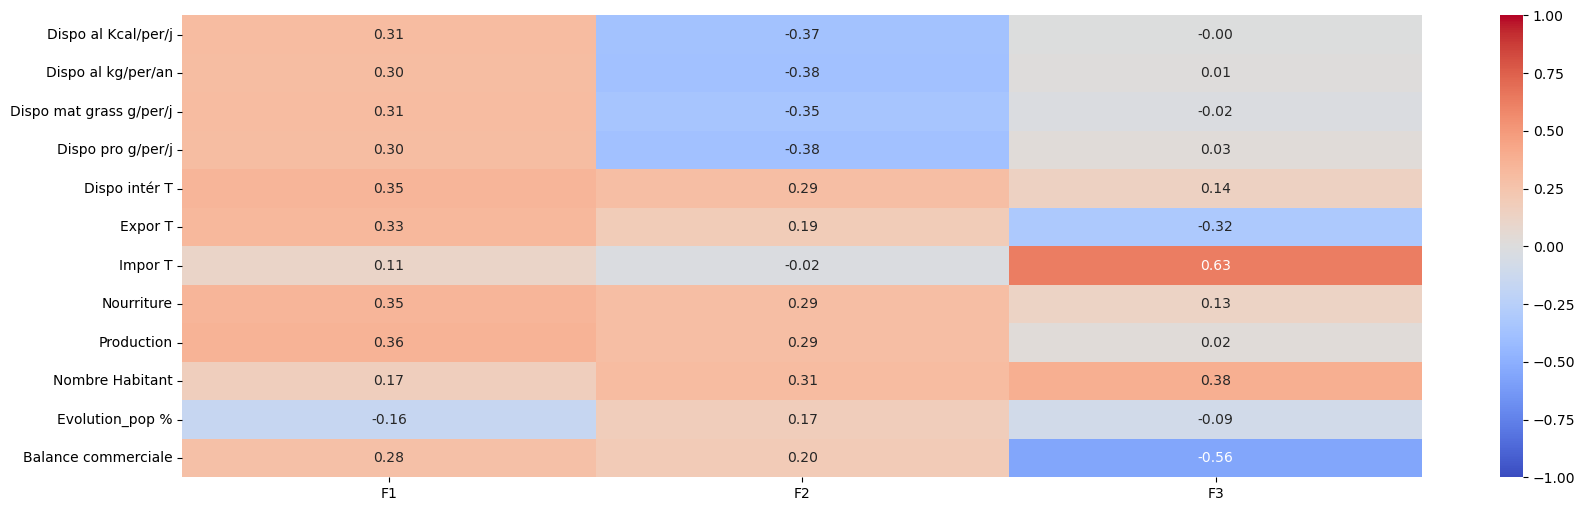

In [30]:
# J'affiche le resultat dans une heatmap (la matrice de corrélation) 
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(composantes_r.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

#### Commentaire : 
F1:
Les coefficients les plus élevés dans F1 sont associés à la disponibilité alimentaire. 
Les pays ayant des valeurs élevées de F1 ont une disponibilité alimentaire, une production alimentaire et une disponibilité intérieure plus élevées, ce qui indique une abondance alimentaire. De plus, cela pourrait être lié à une population plus importante.

F2:Les coefficients les plus élevés dans F2 sont associés à la disponibilité alimentaire en termes de quantité et de protéines.
Les pays ayant des valeurs élevées de F2 cela pourrait indiquer une alimentation riche en ces nutriments.

F3:
Les coefficients les plus élevés dans F3 sont associés à l'importation et donc à la balance commerciale. 
Les pays ayant des valeurs élevées de F3 ont tendance à avoir une plus grande dépendance aux importations et une balance commerciale moins favorable.
En résumé, F1 semble liée à l'abondance alimentaire, F2 à la quantité et à la qualité des nutriments alimentaires, et F3 à la dépendance aux importations. 

In [31]:
def correlation_graph(pca, x_y, colonne):
       # Extraits x et y
    x,y = x_y
    
    
    fig, ax = plt.subplots(figsize=(10, 9))
    
    # Pour chaque composante
    for i in range(0, pca.components_.shape[1]):
        
        # Les flèches
        ax.arrow(
            0,0,
            pca.components_[x, i],
            pca.components_[y, i],
            head_width=0.07,
            head_length=0.07,
            width=0.02,
        )
        
        # Les labels
        plt.text(
            pca.components_[x, i] + 0.05,
            pca.components_[y, i] + 0.05,
            colonne[i]
        )
        
    # Affichage des lignes horizonzales et verticales
    plt.plot([-1, 1], [0,0], color="grey", ls="--")
    plt.plot([0,0], [-1, 1], color="grey", ls="--")
        
    # Nom des axes, avec pourcentage d'inertie expliqué
    plt.xlabel('F{} ({})%'.format(x+1, round(100*pca.explained_variance_ratio_[x], 1)))
    plt.ylabel('F{} ({})%'.format(y+1, round(100*pca.explained_variance_ratio_[y], 1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))

    plt.axis('equal')
    plt.show(block=False)

## 3.3 Cercle des corrélations : 1er plan factoreil

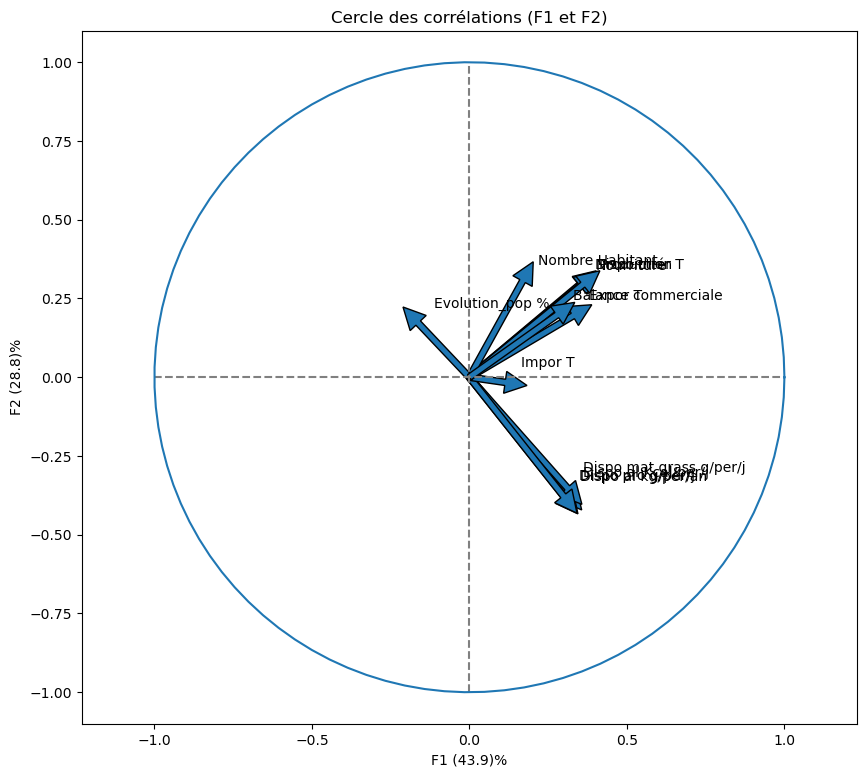

In [32]:
correlation_graph(pca, (0,1), colonne)


#### F1 : L'ensemble des variables sont positivement corrélées à la variable synthétique F1 excepté la variable 'Evolution popu' qui est anticorélée à F1. Les variables les plus corrélées à F1 sont les variables relatives à la disponibilité.
#### F2 : L'ensemble des variables sont positivement corrélées à la variable synthétique F2 excepté la variable 'Import T' ainsi que les variables relatives à la disponibilité qui elles, sont anticorélées. 
 #### La dimension 'Impor T' qui est petite sur le premier plan factoriel, signifie qu’elle est faiblement corrélée à la première composante F1 ainsi qu'à la deuxième composante F2. En effet, Elle est mal représentée sur le premier plan factoriel.


### 2ème plan factoriel

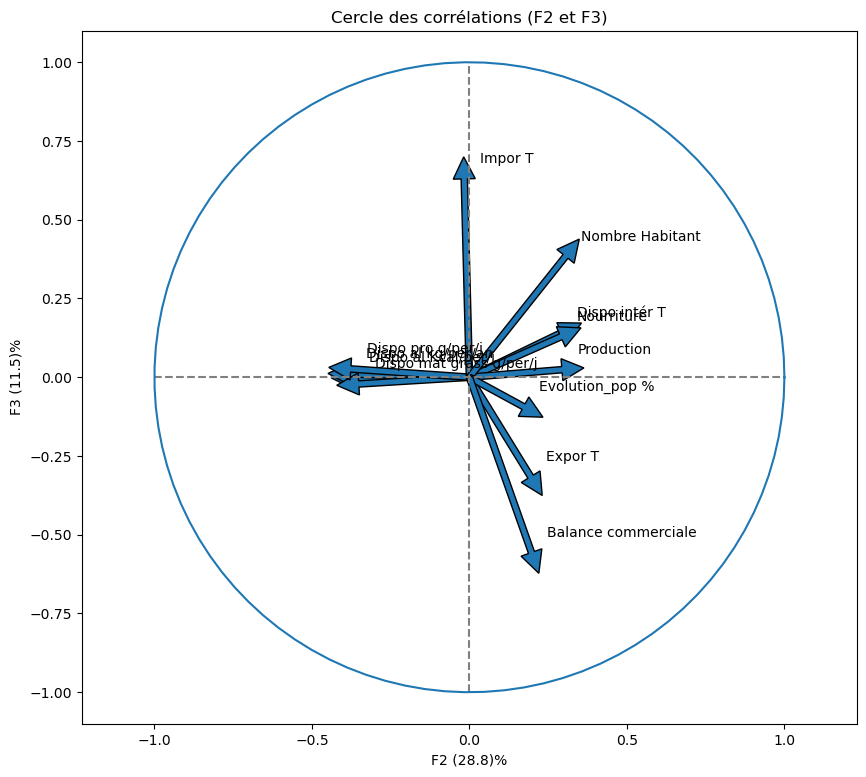

In [33]:
correlation_graph(pca, (1,2), colonne)

#### F3 : L'ensemble des variables sont positivement corrélées à la variable synthétique F3 excepté les variables 'Evolution popu', 'Expor T' , 'Balance commerciale' ainsi que dispo calories qui sont anticorélées. F2 : Seule les variables,relative à la disponobilé sont anticorélées. 

## 3.4 Projection des individus

In [34]:
# Je calcule les coordonnées des individus dans le nouvel espace Rp
x_proj = pca.transform(X_scaled)
x_proj[:6]

array([[-2.05546995,  1.60159901, -0.30731346],
       [ 1.84919562, -1.29762713,  2.24992741],
       [-0.26252983, -0.61567669, -0.12481225],
       [-1.53034703,  1.22111075, -0.34354577],
       [ 1.23783571,  0.47737067,  2.74183022],
       [-1.45983879,  0.89834526,  0.78929118]])

In [35]:
x_y = (0,1)
x_y

(0, 1)

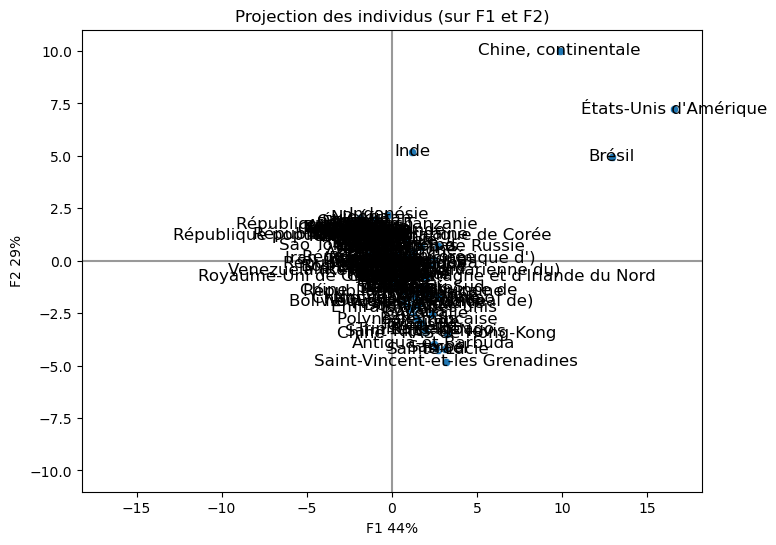

In [36]:
# Graphique du nuage des individus Ni dans l'espace Rp
def display_factorial_planes(x_proj, x_y, pca=None, labels=None, clusters=None, names=None, figsize=[8, 6], marker="."):
    X_ = np.array(x_proj)
    x, y = x_y

    fig, ax = plt.subplots(figsize=figsize)
    c = None if clusters is None else clusters
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    if pca:
        F1 = f'{round(100 * pca.explained_variance_ratio_[x])}%'
        F2 = f'{round(100 * pca.explained_variance_ratio_[y])}%'
    else:
        F1 = F2 = ''

    ax.set_xlabel(f'F{x+1} {F1}')
    ax.set_ylabel(f'F{y+1} {F2}')

    x_max = np.abs(X_[:, x]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0, 0], [-y_max, y_max], color='grey', alpha=0.8)

    if labels:
        for i, (_x, _y) in enumerate(X_[:, [x, y]]):
            plt.text(_x, _y + 0.05, labels[i], fontsize='14', ha='center', va='center')

    if names is not None:
        for i, (_x, _y) in enumerate(X_[:, [x, y]]):
            plt.text(_x, _y + 0.05, names[i], fontsize='12', ha='center', va='center', color='black')

    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

x_y = [0, 1]
display_factorial_planes(x_proj, x_y, pca, marker="o", names=pays)

In [37]:
x_y = (1,2)

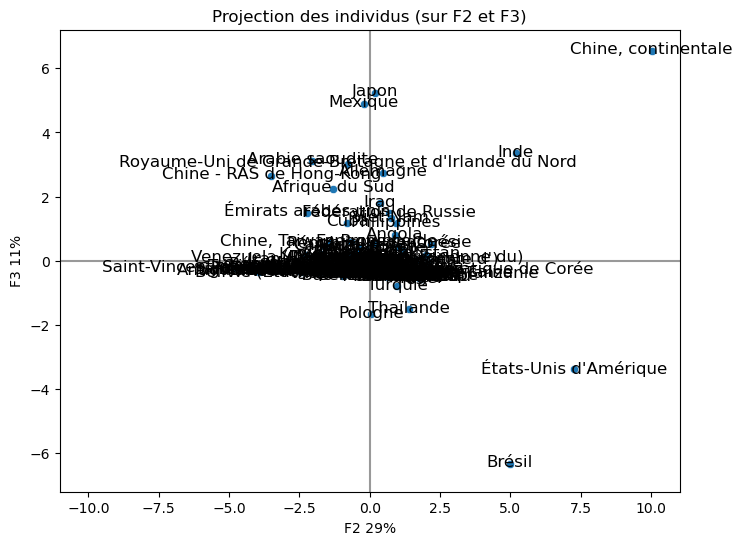

In [38]:
# Graphique du nuage des individus Ni dans l'espace Rp
def display_factorial_planes(x_proj, x_y, pca=None, labels=None, clusters=None, names=None, figsize=[8, 6], marker="."):
    X_ = np.array(x_proj)
    x, y = x_y

    fig, ax = plt.subplots(figsize=figsize)
    c = None if clusters is None else clusters
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    if pca:
        F2 = f'{round(100 * pca.explained_variance_ratio_[x])}%'
        F3 = f'{round(100 * pca.explained_variance_ratio_[y])}%'
    else:
        F2 = F3 = ''

    ax.set_xlabel(f'F{x+1} {F2}')
    ax.set_ylabel(f'F{y+1} {F3}')

    x_max = np.abs(X_[:, x]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0, 0], [-y_max, y_max], color='grey', alpha=0.8)

    if labels:
        for i, (_x, _y) in enumerate(X_[:, [x, y]]):
            plt.text(_x, _y + 0.05, labels[i], fontsize='14', ha='center', va='center')

    if names is not None:
        for i, (_x, _y) in enumerate(X_[:, [x, y]]):
            plt.text(_x, _y + 0.05, names[i], fontsize='12', ha='center', va='center', color='black')

    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

x_y = [1, 2]
display_factorial_planes(x_proj, x_y, pca, marker="o", names=pays)

## 4. Classification ascendante hiérarchique CAH

In [40]:
# J'extrais les valeurs numériques du df
Y = df.values
Y

array([[ 5.0000000e+00,  1.5300000e+00,  3.3000000e-01, ...,
         3.6296113e+07,  2.5800000e+00, -2.9000000e+01],
       [ 1.4300000e+02,  3.5690000e+01,  9.2500000e+00, ...,
         5.7009756e+07,  1.4300000e+00, -4.5100000e+02],
       [ 8.5000000e+01,  1.6360000e+01,  6.4500000e+00, ...,
         2.8841690e+06, -8.0000000e-02, -3.8000000e+01],
       ...,
       [ 3.0000000e+01,  8.5300000e+00,  1.8500000e+00, ...,
         2.7834819e+07,  2.4500000e+00, -7.8000000e+01],
       [ 1.1000000e+01,  3.4200000e+00,  7.2000000e-01, ...,
         1.6853599e+07,  3.0000000e+00, -1.1000000e+01],
       [ 1.6000000e+01,  4.6800000e+00,  9.9000000e-01, ...,
         1.4236595e+07,  1.4700000e+00, -6.0000000e+00]])

In [41]:
pays = df.index
pays

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Turkménistan', 'Turquie', 'Ukraine', 'Uruguay', 'Vanuatu',
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe'],
      dtype='object', name='Pays', length=167)

In [42]:
colonne = df.columns
colonne

Index(['Dispo al Kcal/per/j', 'Dispo al kg/per/an', 'Dispo mat grass g/per/j',
       'Dispo pro g/per/j', 'Dispo intér T', 'Expor T', 'Impor T',
       'Nourriture', 'Production', 'Nombre Habitant', 'Evolution_pop %',
       'Balance commerciale'],
      dtype='object')

In [43]:
# J'instancie et ajuste le StandardScaler pour centrer et réduire les données (ramène les données entre -1 et 1)
scaler = preprocessing.StandardScaler()
Y_scaled = scaler.fit_transform(Y)

In [44]:
# Je vérifie si la moyenne est bien à 0 et l'écart type à 1
idx = ["mean", "std"]
pd.DataFrame(Y_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11
mean,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [45]:
# Je réalise la CAH sur les données standardisées
Z = linkage(Y_scaled, method='ward')

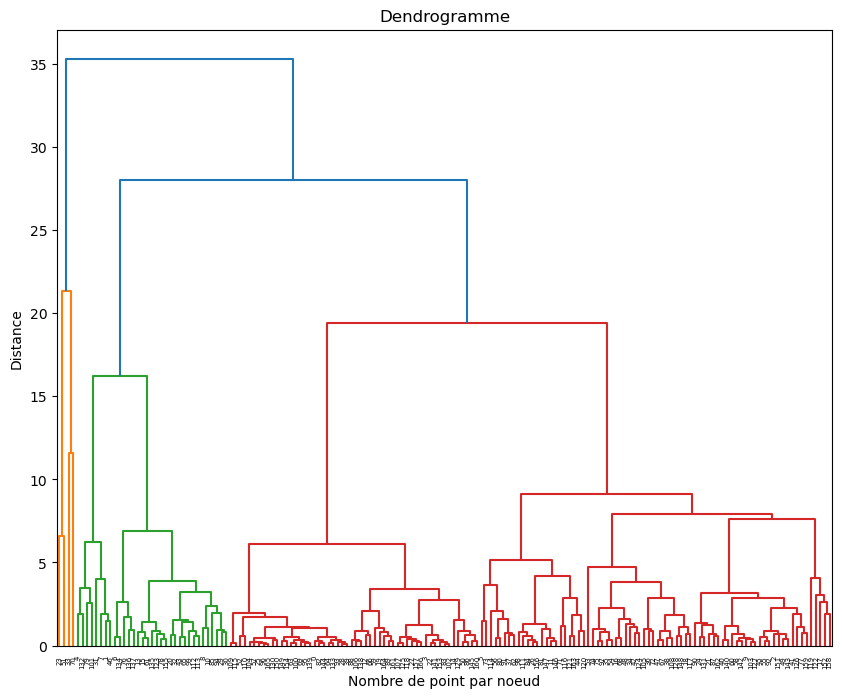

In [46]:
# J'affiche le 1er dendrogramme global
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
_ = dendrogram(Z, ax=ax)

plt.title("Dendrogramme")
plt.xlabel("Nombre de point par noeud")
plt.ylabel("Distance")
plt.show()

#### La profondeur du dendrogramme le rend illisible. certains paramètres sont à changer pour obtenir un dendogramme plus claire.

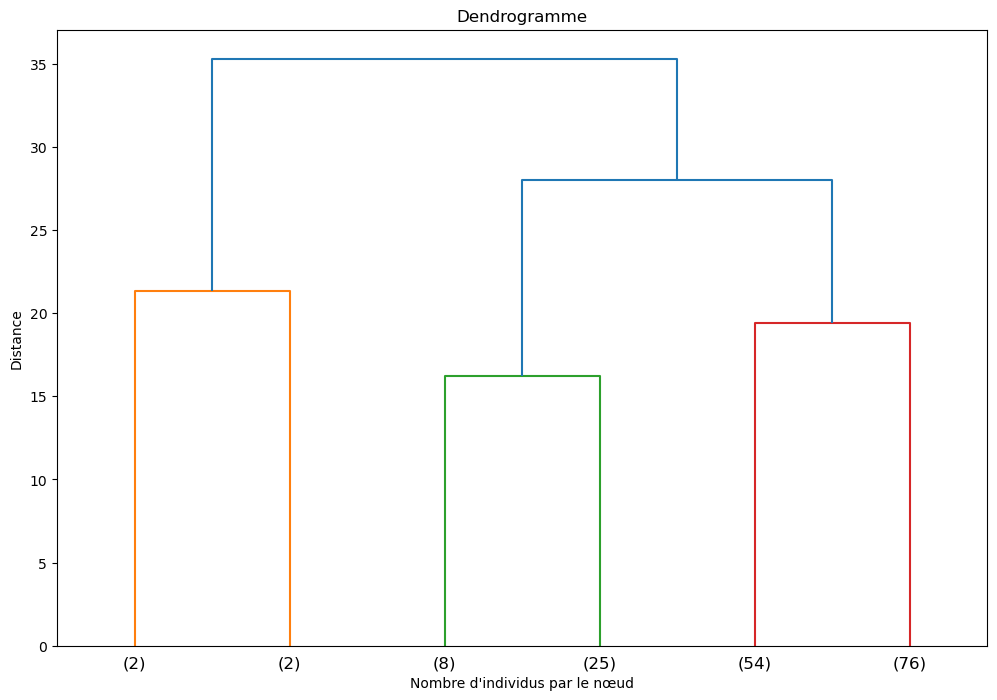

In [47]:
# J'affiche 6 clusters pour avoir un arbre plus lisible.(Coupage en 6 groupes pour avoir une idée du partitionnement)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
_ = dendrogram(Z, p=6, truncate_mode="lastp", ax=ax) # p=6 ,truncate_mode="lastp" signifient que je vais afficher que 6 clusters

plt.title("Dendrogramme")
plt.xlabel("Nombre d'individus par le nœud")
plt.ylabel("Distance")
plt.show()

In [48]:
# J'utilise AgglomerativeClustering pour déterminer le contenu des clusters.
cah = AgglomerativeClustering(n_clusters=6, linkage="ward")

In [49]:
# J'applique l'algorithme sur mes données centrées reduites
cah.fit(Y_scaled)

AgglomerativeClustering(n_clusters=6)

In [50]:
# J'enregistre mes clusters dans une variable 
clusters_cah = cah.labels_

In [51]:
# J'enregistre mes cluesters dans une nouvelle variable dans mon df 
df['cluster_CAH'] = clusters_cah
df.head()

,Dispo al Kcal/per/j,Dispo al kg/per/an,Dispo mat grass g/per/j,Dispo pro g/per/j,Dispo intér T,Expor T,Impor T,Nourriture,Production,Nombre Habitant,Evolution_pop %,Balance commerciale,cluster_CAH
Pays,,,,,,,,,,,,,
Afghanistan,5.0,1.53,0.33,0.54,57.0,0.0,29.0,55.0,28.0,36296113,2.58,-29.0,4
Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0,57009756,1.43,-451.0,5
Albanie,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0,2884169,-0.08,-38.0,2
Algérie,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,41389189,2.07,-2.0,4
Allemagne,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0,82658409,0.57,-196.0,5


In [52]:
df['cluster_CAH'].nunique()

6

In [53]:
# Je récupere la liste des pays par cluster
for i in range(6): 
    print(f'Cluster {i}')
    pays_cluster_cah = df[df['cluster_CAH'] == i].index.tolist()
    print(pays_cluster_cah)
    print()

Cluster 0
['Chine, continentale', 'Inde']

Cluster 1
['Antigua-et-Barbuda', 'Argentine', 'Australie', 'Bahamas', 'Barbade', 'Bolivie (État plurinational de)', 'Canada', 'Chili', 'Chine - RAS de Macao', 'Dominique', 'Grenade', 'Guyana', 'Israël', 'Jamaïque', 'Koweït', 'Malaisie', 'Maurice', 'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Polynésie française', 'Sainte-Lucie', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Samoa', 'Trinité-et-Tobago']

Cluster 2
['Albanie', 'Angola', 'Arménie', 'Autriche', 'Bélarus', 'Belgique', 'Belize', 'Bosnie-Herzégovine', 'Bulgarie', 'Cabo Verde', 'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Congo', 'Costa Rica', 'Croatie', 'Cuba', 'Danemark', 'Égypte', 'El Salvador', 'Équateur', 'Espagne', 'Estonie', 'Fédération de Russie', 'Fidji', 'Finlande', 'Gabon', 'Géorgie', 'Grèce', 'Guatemala', 'Honduras', 'Hongrie', 'Indonésie', "Iran (République islamique d')", 'Iraq', 'Irlande', 'Islande', 'Italie', 'Jordanie', 'Kazakhstan', 'Kiribati', 'Le

In [54]:
# Nombre de pays par cluster
df['cluster_CAH'].value_counts()

2    76
4    54
1    25
5     8
3     2
0     2
Name: cluster_CAH, dtype: int64

### 4.2 Projection des clusters CAH

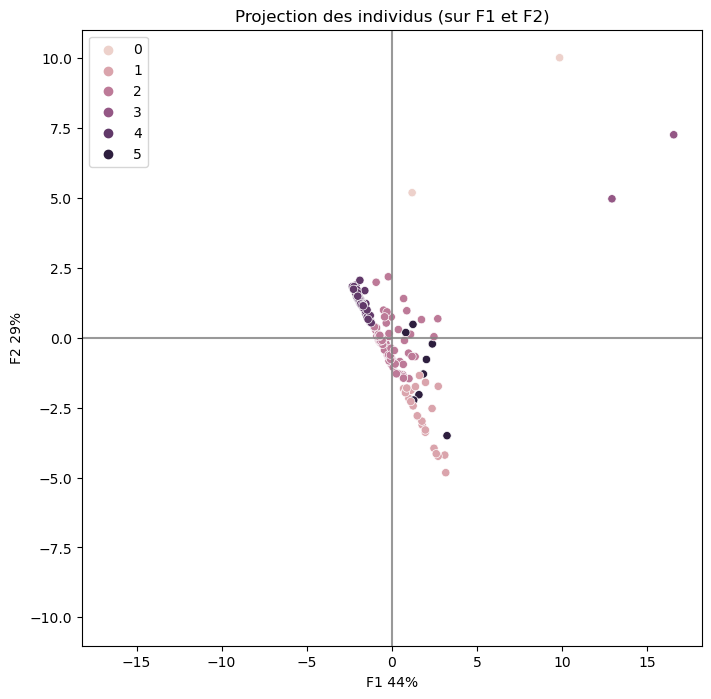

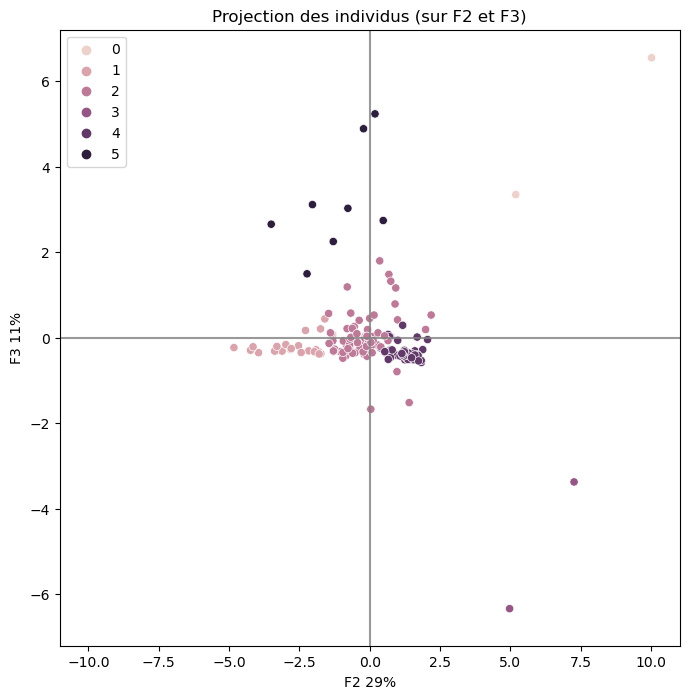

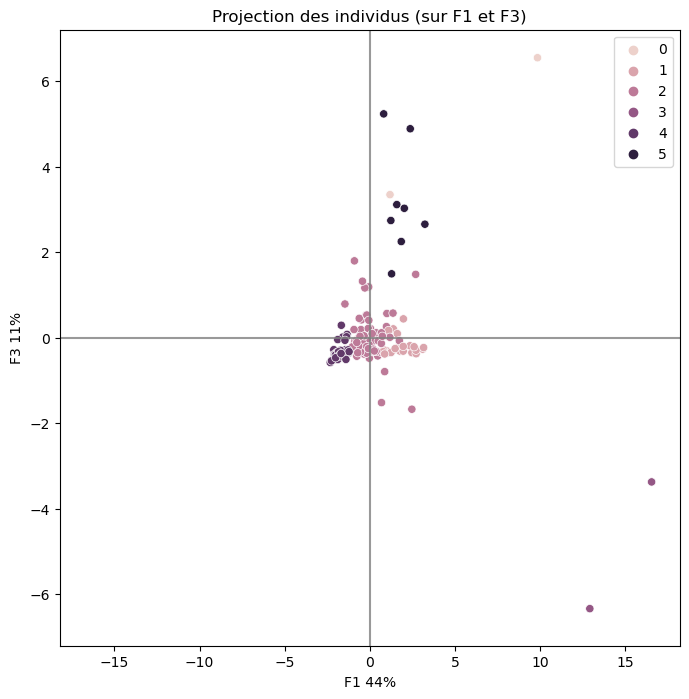

In [55]:
X_proj = pca.transform(Y_scaled)
display_factorial_planes(X_proj, (0,1), pca, figsize=(8,8), clusters=clusters_cah)
display_factorial_planes(X_proj, (1,2), pca, figsize=(8,8), clusters=clusters_cah)
display_factorial_planes(X_proj, (0,2), pca, figsize=(8,8), clusters=clusters_cah)

In [56]:
# J'affiche les clusters en faisant la moyenne de chaque variable pour comprendre la caratérisation des clusters
df_clusters_cah = df.groupby(['cluster_CAH']).mean().round(0)    
df_clusters_cah

,Dispo al Kcal/per/j,Dispo al kg/per/an,Dispo mat grass g/per/j,Dispo pro g/per/j,Dispo intér T,Expor T,Impor T,Nourriture,Production,Nombre Habitant,Evolution_pop %,Balance commerciale
cluster_CAH,,,,,,,,,,,,
0,33.0,7.0,3.0,2.0,10911.0,290.0,226.0,10242.0,10890.0,1.379849e+09,1.0,64.0
1,178.0,47.0,12.0,16.0,349.0,24.0,30.0,323.0,361.0,7.681127e+06,1.0,-6.0
2,76.0,21.0,5.0,8.0,500.0,84.0,82.0,469.0,516.0,2.657710e+07,1.0,2.0
3,212.0,52.0,15.0,18.0,14124.0,3958.0,63.0,14041.0,18058.0,2.664593e+08,1.0,3894.0
4,16.0,5.0,1.0,2.0,67.0,0.0,17.0,64.0,52.0,2.315761e+07,2.0,-16.0
5,129.0,35.0,8.0,13.0,1856.0,232.0,780.0,1804.0,1393.0,6.357130e+07,1.0,-548.0


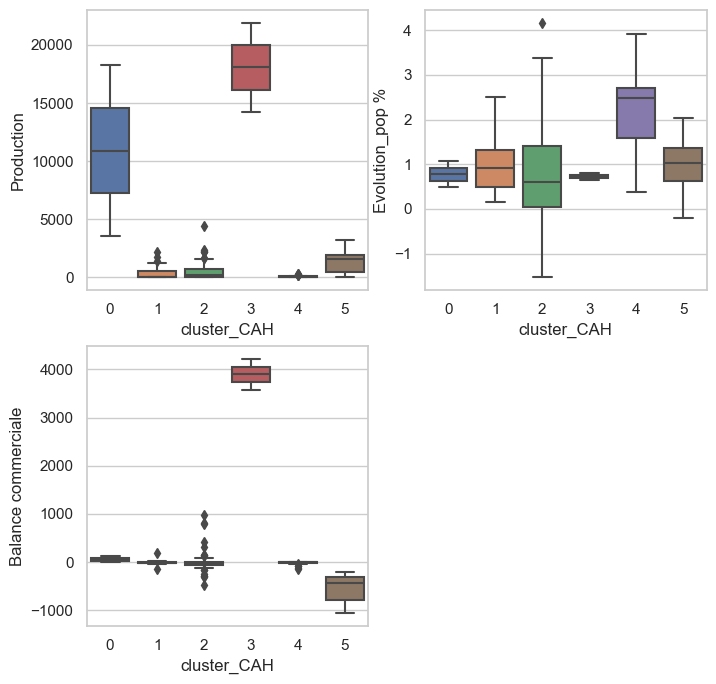

In [57]:
# Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes 
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df, x='cluster_CAH', y='Production')
plt.subplot(222)
sns.boxplot(data=df, x='cluster_CAH', y='Evolution_pop %')
plt.subplot(223)
sns.boxplot(data=df, x='cluster_CAH', y='Balance commerciale')
plt.savefig('Distribution des variables par groupe.jpg')

### INDICATEURS:
Balance commerciale + =  se produit lorsque la valeur des exportations dépasse la valeur des importations. Cela signifie que le pays vend à l'étranger qu'il n'en achète.
Balance commerciale -  =  se produit lorsque la valeur des importations dépasse la valeur des exportations. Cela signifie que le pays achète plus à l'étranger qu'il n'en vend.

Production  = production peu élevée manque d'auto suffisance. 
Évolution de la population +  = pays interresants pour l'exportation, + la population augmente  + la demande augmente. 

En se basant sur les indicateurs choisis, le calcule des moyennes ci_dessus ainsi que les representations graphiques: Les groupes 4 et 5 semblent être les plus intressants pour l'exportation, en effet, ses pays présentent une balance commerciale trés négative, une production faible et une population en évolution. 
Les deux groupes comptent 62 pays au total, une analyse plus fine de ces groupes est donc necessaire pour cibler les pays les plus interessants pour notre exportation. 

### 4.3 Études plus fine des caractéristiques des deux groupes selectionnés de la CAH

In [58]:
# Je crée le df_CAH (sous-ensemble des clustres 4 et 5) sur critères des indicateurs mentionnés ci-dessus: 
df_cah = df.query('[4, 5] in cluster_CAH') 
df_cah.head()

,Dispo al Kcal/per/j,Dispo al kg/per/an,Dispo mat grass g/per/j,Dispo pro g/per/j,Dispo intér T,Expor T,Impor T,Nourriture,Production,Nombre Habitant,Evolution_pop %,Balance commerciale,cluster_CAH
Pays,,,,,,,,,,,,,
Afghanistan,5.0,1.53,0.33,0.54,57.0,0.0,29.0,55.0,28.0,36296113,2.58,-29.0,4
Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0,57009756,1.43,-451.0,5
Algérie,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,41389189,2.07,-2.0,4
Allemagne,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0,82658409,0.57,-196.0,5
Arabie saoudite,151.0,43.36,9.38,15.57,1435.0,10.0,722.0,1435.0,616.0,33101178,2.03,-712.0,5


###  Analyse du groupe 4

In [59]:
# J'affiche la moyenne de chaque variable pour le groupe 4
cluster_4_CAH = df_cah[df_cah['cluster_CAH'] == 4].mean().round(0)
cluster_4_CAH

Dispo al Kcal/per/j              16.0
Dispo al kg/per/an                5.0
Dispo mat grass g/per/j           1.0
Dispo pro g/per/j                 2.0
Dispo intér T                    67.0
Expor T                           0.0
Impor T                          17.0
Nourriture                       64.0
Production                       52.0
Nombre Habitant            23157607.0
Evolution_pop %                   2.0
Balance commerciale             -16.0
cluster_CAH                       4.0
dtype: float64

#### Ce groupe inclus essentiellement des pays avec une moyenne de : 
#### Production faible à : 52 tonnes de viande de volaille par an. (2017) 
#### Balance commérciale négative à : -16 en 2017.  
#### Une croissance démographique élevée à : 2% pour l'année 2017. 

In [60]:
# J'affiche la liste des pays du cluster 4 
pays_cluster4_cah = df[df['cluster_CAH'] == 4].index.tolist()
print(pays_cluster4_cah)

['Afghanistan', 'Algérie', 'Azerbaïdjan', 'Bangladesh', 'Bénin', 'Botswana', 'Burkina Faso', 'Cambodge', 'Cameroun', "Côte d'Ivoire", 'Eswatini', 'Éthiopie', 'Gambie', 'Ghana', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Îles Salomon', 'Kenya', 'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Mongolie', 'Mozambique', 'Namibie', 'Népal', 'Niger', 'Nigéria', 'Ouganda', 'Paraguay', 'République centrafricaine', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Rwanda', 'Sao Tomé-et-Principe', 'Sénégal', 'Sierra Leone', 'Soudan', 'Sri Lanka', 'Tadjikistan', 'Tchad', 'Timor-Leste', 'Togo', 'Turkménistan', 'Uruguay', 'Vanuatu', 'Yémen', 'Zambie', 'Zimbabwe']


In [61]:
nombre_de_pays = len(pays_cluster4_cah)
print("Nombre de pays dans le cluster 4 est :", nombre_de_pays)

Nombre de pays dans le cluster 4 est : 54


### Analyse du groupe 5

In [62]:
# J'affiche la moyenne de chaque variable pour le groupe 5
cluster_5_CAH = df_cah[df_cah['cluster_CAH'] == 5].mean().round(0)
cluster_5_CAH

Dispo al Kcal/per/j             129.0
Dispo al kg/per/an               35.0
Dispo mat grass g/per/j           8.0
Dispo pro g/per/j                13.0
Dispo intér T                  1856.0
Expor T                         232.0
Impor T                         780.0
Nourriture                     1804.0
Production                     1393.0
Nombre Habitant            63571297.0
Evolution_pop %                   1.0
Balance commerciale            -548.0
cluster_CAH                       5.0
dtype: float64

#### Ce groupe inclus essentiellement des pays avec une moyenne de : 
#### Production correcte à : 1393 tonnes de viande de volaille par an. (2017) 
#### Balance commerciale très négative à : -548 en 2017.  
#### Une croissance démographique corrcete à : 1% pour l'année 2017. 

In [63]:
# J'affiche la liste des pays du cluster 5
pays_cluster5_cah = df[df['cluster_CAH'] == 5].index.tolist()
print(pays_cluster5_cah)

['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Chine - RAS de Hong-Kong', 'Émirats arabes unis', 'Japon', 'Mexique', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


In [64]:
nombre_de_pays = len(pays_cluster5_cah)
print("Nombre de pays dans le cluster 5 est :", nombre_de_pays)

Nombre de pays dans le cluster 5 est : 8


#### Conclusion CAH:
Au vu des élements mentionnés ci dessus, le groupe le plus interessant pour notre exporatation serait le groupe 5, en effet, celui ci regroupe les pays qui ont une balance commerciale trés négative -548 comparé au groupe 4 qui lui à une balance commerciale de -16. Le groupe 5 à une production basse et une évolution de la population correcte.  Plus la population augement plus la demande augmente. De plus, en se basant sur notre culture génerale, les pays du cluster 4, sont geographiquement loin de la france excepté l'Algérie, contrairement au pays du cluster 5 dont la majorité d'entre eux sont des pays européens et donc plus proche et avec abscence de contrainte au niveau douane etc.  La liste des pays est réduite à 8 pays. 

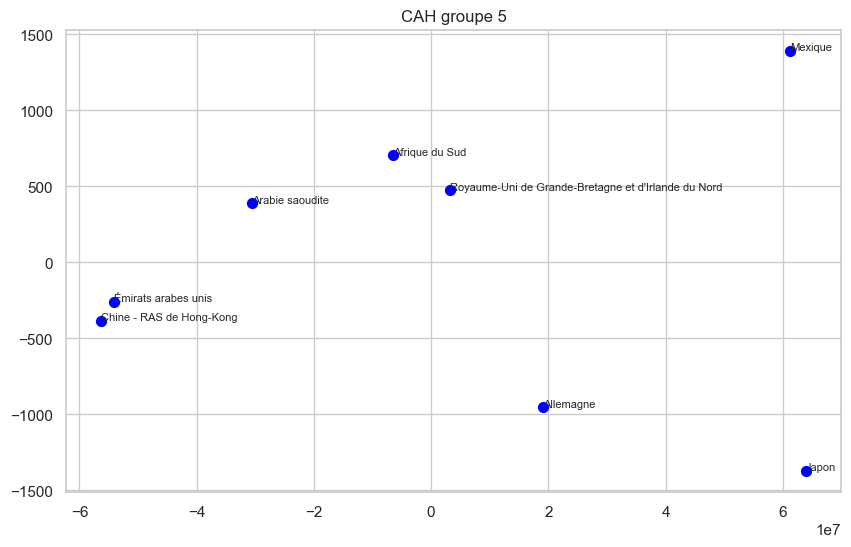

In [65]:
# GraphiqUe nuage de point pour les pays du groupe 5
df_cluster5 = df.loc[pays_cluster5_cah]
pca = PCA(n_components=2)
X_projected = pca.fit_transform(df_cluster5)
plt.figure(figsize=(10, 6))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c='blue', marker='o', s=50, label='Cluster 5')
for i, pays in enumerate(df_cluster5.index):
    plt.annotate(pays, (X_projected[i, 0], X_projected[i, 1]), fontsize=8)
plt.title('CAH groupe 5')
plt.grid(True)
plt.show()

In [66]:
# Je supprime la variable 'Clusters_CAH' du df initiale pour ne pas qu'elle fausse mon analyse par la suite
df.drop("cluster_CAH", axis=1, inplace=True)

## 5. K-MEANS

#### METHODE SILHOUETTE

In [67]:
# Je prends les donnees déja transformées
K = pd.DataFrame(X_scaled) 

In [68]:
# Je vérifie si la moyenne est bien à 0 et l'écart type à 1
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11
mean,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


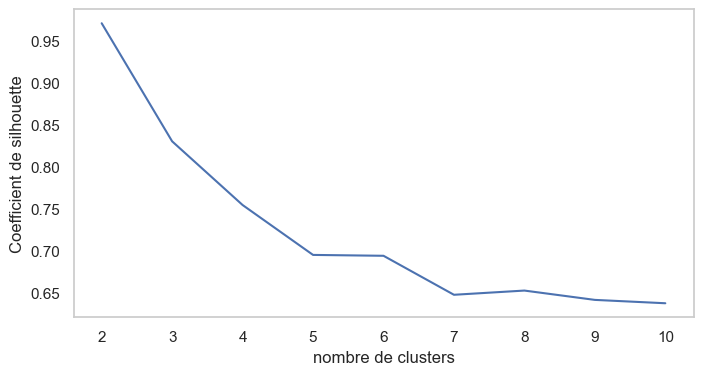

[0.9703668803442949,
 0.8302208992801818,
 0.7546382204122979,
 0.6954105445983706,
 0.6943783955500887,
 0.6480986708837099,
 0.6530959703088004,
 0.6420301591245265,
 0.6380454073505327]

In [69]:
# J'utilise la méthode de la silhouette
from sklearn.metrics import silhouette_score
tab_silhouette =[] # Je définis d'abord une liste vide pour sotcker les coeff
k_range=range(2,11) # Je définis la liste du nombre de coeff que je souhaite tester
for k in k_range:
    model=KMeans(n_clusters=k)
    cluster_labels=model.fit_predict(Y)
    tab_silhouette.append(silhouette_score(Y,cluster_labels))

fig = plt.figure(figsize=(8,4))
plt.plot(k_range,tab_silhouette)
plt.xlabel('nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid()
plt.show()
tab_silhouette

In [70]:
# Je définis d'abord une liste vide pour sotcker les inerties
intertie = []

In [71]:
# Je définis la liste du nombre de clusters (K) que je souhaite tester
k_liste = range(1, 11)
list(k_liste)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [72]:
# Pour chaque valeur de K, j'entraine un k-means et je stocke son inertie
for i in k_liste :
    kmeans = KMeans(n_clusters=i) # J'instancie un k-means pour K clusters
    kmeans.fit(X_scaled) # J'entraine les données transformées
    intertie.append(kmeans.inertia_) # J'enregistre l'inertie obtenue

In [73]:
# J'affiche la liste d'inerties obetenues 
intertie

[2004.0000000000002,
 1307.0219930445219,
 859.2105183315463,
 693.2515904882804,
 554.3738982093096,
 422.4596656363861,
 353.68058023367524,
 309.3836406740342,
 279.89922853113785,
 259.98619492512813]

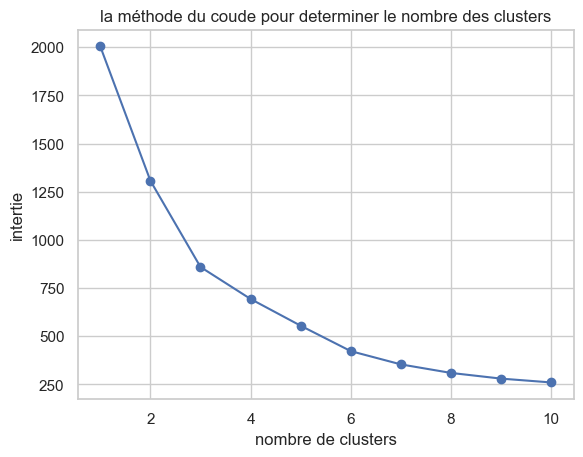

In [74]:
# J'affiche le resultat 
plt.plot(range(1, 11), intertie, marker='o')
plt.title('la méthode du coude pour determiner le nombre des clusters')
plt.xlabel('nombre de clusters')
plt.ylabel('intertie')
plt.show()

#### L'inertie diminue très rapidement entre le cluster 1 et 3 et moins rapidemant entre 3 à 6, et largement plus lentement de 6 jusqu'à 10.  En appliquant la méthode du coude, l'idéale serait de choisir k = 2 voir 3 pour perdre le moins d'information, toutefois, je choisis le nombre de clusters pour lequel je  considére que la cassure est la dernière qui est forte, en loccurence  6.

In [75]:
# Je définis le nombre de clusters à 6 pour une analyse plus fine 
kmeans = KMeans(n_clusters=6) # kmeans_pays nom de l'algoritme appliqué sur les données

In [76]:
# J'entraine le K-means sur les données 
kmeans.fit(K)

KMeans(n_clusters=6)

In [77]:
# J'utilise l'algo une fois entrainé sur sur les données
clusters = kmeans.predict(K)

In [78]:
cluster_km = kmeans.labels_

In [79]:
# Je l'enregistre dans une variable
df["clusters_km"] = cluster_km

In [80]:
df["clusters_km"].nunique()

6

In [81]:
# Je récupere la liste des pays par cluster
for i in range(6): 
    print(f'Cluster {i}')
    pays_cluster_km = df[df['clusters_km'] == i].index.tolist()
    print(pays_cluster_km)
    print()

Cluster 0
['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Chine - RAS de Hong-Kong', 'Émirats arabes unis', 'Fédération de Russie', 'Japon', 'Mexique', 'Pays-Bas', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]

Cluster 1
['Brésil', "États-Unis d'Amérique"]

Cluster 2
['Afghanistan', 'Algérie', 'Angola', 'Bangladesh', 'Bénin', 'Botswana', 'Burkina Faso', 'Cambodge', 'Cameroun', "Côte d'Ivoire", 'Égypte', 'Eswatini', 'Éthiopie', 'Gambie', 'Ghana', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Îles Salomon', 'Indonésie', 'Iraq', 'Kenya', 'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Mongolie', 'Mozambique', 'Namibie', 'Népal', 'Niger', 'Nigéria', 'Oman', 'Ouganda', 'Pakistan', 'Paraguay', 'République centrafricaine', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Rwanda', 'Sao Tomé-et-Principe', 'Sénégal', 'Sierra Leone', 'Soudan', 'Sri Lanka', 'Tadjikistan', 'Tchad', 'Timor-Leste', 'Togo', 'Turkménistan', 

In [82]:
# Nombre de pays par cluster
df["clusters_km"].value_counts()

5    70
2    58
4    25
0    10
1     2
3     2
Name: clusters_km, dtype: int64

### 5.2 Projection des clusters KMEANS avec l'ACP

In [83]:
pca = PCA(n_components=6)
pca.fit(K)
K_projected = pca.transform(K)

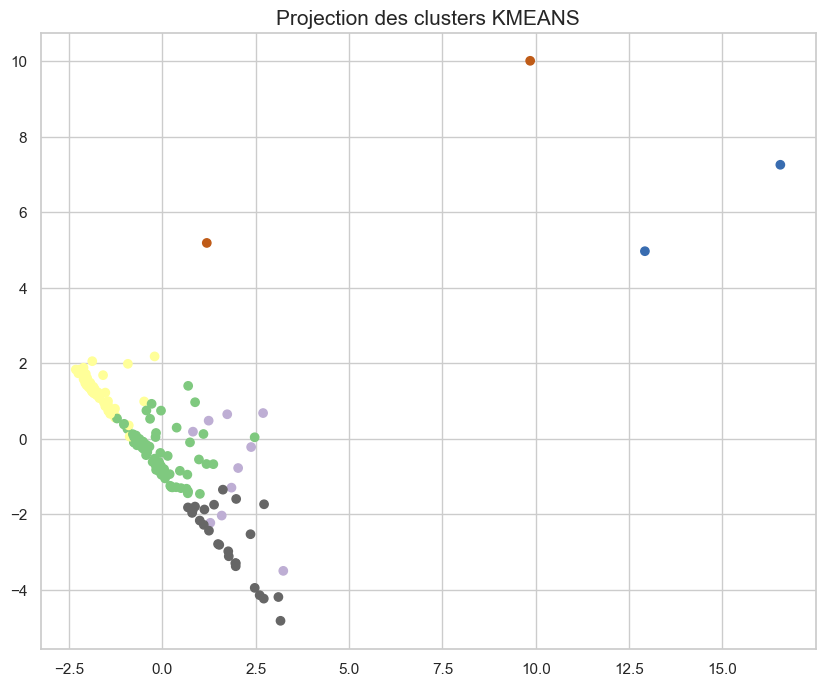

In [84]:
KEMANS = KMeans(n_clusters=6, random_state=3)
KEMANS.fit(K)
clusters = KEMANS.labels_

plt.figure(figsize=(10,8))

# Affichage des points des clusters
plt.scatter(K_projected[:, 0], K_projected[:, 1], c=KEMANS.labels_, cmap='Accent')
plt.title('Projection des clusters KMEANS', fontsize=15)
plt.show()

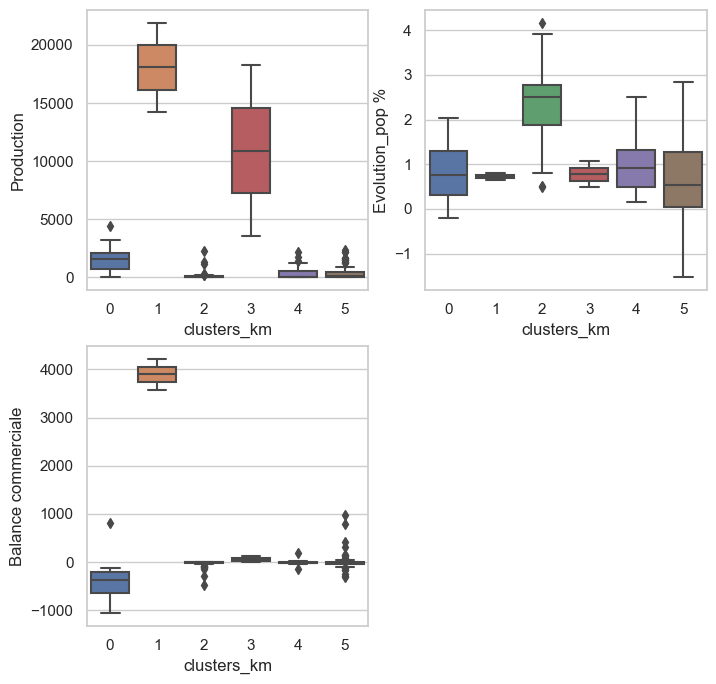

In [85]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les groupes
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df, x='clusters_km', y='Production')
plt.subplot(222)
sns.boxplot(data=df, x='clusters_km', y='Evolution_pop %')
plt.subplot(223)
sns.boxplot(data=df, x='clusters_km', y='Balance commerciale')
plt.savefig('Distribution des variables par groupe.jpg')

### 5.3 Observation des centroides

In [86]:
# J'affiche dans un tableau les clusters par groupe en faisant la moyenne de chaque variable pour comprendre la caratérisation des clusters
df_clusters_km = df.groupby(['clusters_km']).mean().round(0)    
df_clusters_km

,Dispo al Kcal/per/j,Dispo al kg/per/an,Dispo mat grass g/per/j,Dispo pro g/per/j,Dispo intér T,Expor T,Impor T,Nourriture,Production,Nombre Habitant,Evolution_pop %,Balance commerciale
clusters_km,,,,,,,,,,,,
0,121.0,33.0,7.0,12.0,1978.0,339.0,707.0,1928.0,1669.0,6.711218e+07,1.0,-368.0
1,212.0,52.0,15.0,18.0,14124.0,3958.0,63.0,14041.0,18058.0,2.664593e+08,1.0,3894.0
2,18.0,5.0,1.0,2.0,160.0,1.0,32.0,149.0,129.0,3.238386e+07,2.0,-31.0
3,33.0,7.0,3.0,2.0,10911.0,290.0,226.0,10242.0,10890.0,1.379849e+09,1.0,64.0
4,178.0,47.0,12.0,16.0,349.0,24.0,30.0,323.0,361.0,7.681127e+06,1.0,-6.0
5,78.0,21.0,5.0,8.0,392.0,69.0,63.0,366.0,414.0,1.756507e+07,1.0,5.0


In [87]:
# Je crée une copie de mon df clusters_km
df_clusters_km = df.copy()

In [88]:
# Je supprime les clusters de l'index
df_clusters_km.reset_index(inplace=True) 

In [89]:
# Je calcule les centroides de mes classes
centroids = kmeans.cluster_centers_

In [90]:
# Je crée un df pour stocker les centroides comme valeurs
centroid = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns[:-1])
centroid.round()

,Dispo al Kcal/per/j,Dispo al kg/per/an,Dispo mat grass g/per/j,Dispo pro g/per/j,Dispo intér T,Expor T,Impor T,Nourriture,Production,Nombre Habitant,Evolution_pop %,Balance commerciale
0,121.0,33.0,7.0,12.0,1978.0,339.0,707.0,1928.0,1669.0,6.711218e+07,1.0,-368.0
1,211.0,52.0,15.0,18.0,14124.0,3958.0,63.0,14041.0,18058.0,2.664593e+08,1.0,3895.0
2,18.0,5.0,1.0,2.0,160.0,1.0,32.0,149.0,129.0,3.238386e+07,2.0,-31.0
3,33.0,7.0,3.0,2.0,10911.0,290.0,226.0,10242.0,10890.0,1.379849e+09,1.0,64.0
4,178.0,47.0,12.0,16.0,349.0,24.0,30.0,323.0,361.0,7.681127e+06,1.0,-6.0
5,78.0,21.0,5.0,8.0,392.0,69.0,63.0,366.0,414.0,1.756507e+07,1.0,5.0


#### J'obtiens excatement le même résultat qu'avec la methode groupby(['clusters_km']).mean(). Je vais maintenant afficher les centroides dans un graphique avec l'ACP

### 5.4 Projection des centroides KMEANS avec l'ACP

In [91]:
centroids_projected = pca.transform(centroids)

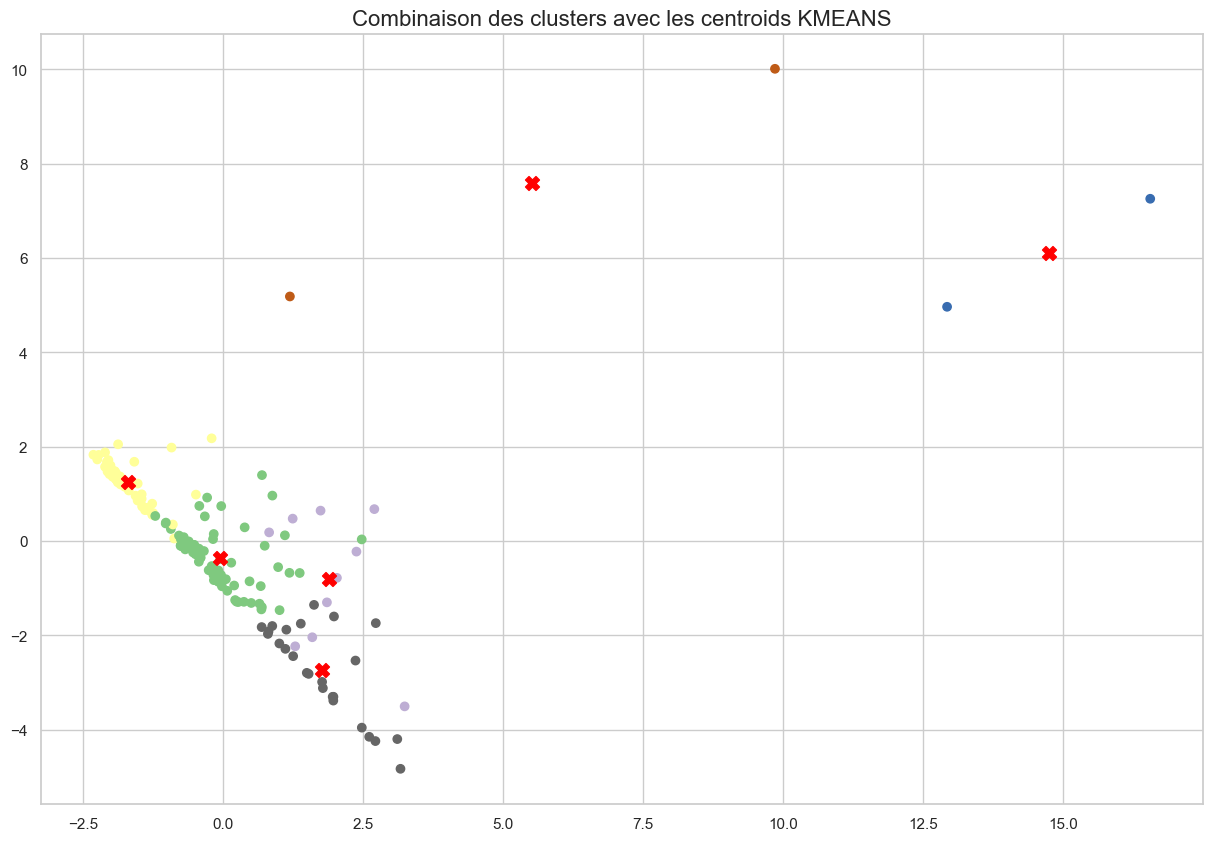

In [92]:
# Affichage des centroids dans les clusters 
plt.figure(figsize=(15,10))

plt.scatter(K_projected[:, 0], K_projected[:, 1], c=KEMANS.labels_, cmap='Accent')

plt.scatter(centroids_projected[:,0], centroids_projected[:,1], marker='X', s=100, c='RED', label='Centroids')

plt.title('Combinaison des clusters avec les centroids KMEANS', fontsize=16)
plt.show()


### Rappel:

Balance commerciale + =  se produit lorsque la valeur des exportations dépasse la valeur des importations. Cela signifie que le pays vend à l'étranger qu'il n'en achète.
 Balance commerciale -  =  se produit lorsque la valeur des importations dépasse la valeur des exportations. Cela signifie que le pays achète plus à l'étranger qu'il n'en vend.

Production élevée = auto suffisance donc peu ou pas d'imporattion. 
Evolution de la population +  = pays interresants pour les exportations, car + la population augmente  + la demande augmente. 

En se basant sur les indicateurs choisis, le calcule des moyennes ci_dessus ainsi que les representations graphiques: Les groupes 0 et 2 semblent être les plus intressants pour l'exportation, en effet, ses pays présentent une balance commerciale trés négative, une production faible et une population en évolution. 
Les deux groupes comptent 68 pays au total, une analyse plus fine de ces groupes est donc necessaire pour cibler les pays les plus interessants pour notre exportation. 

### 5.5 Études plus fine des caractéristiques des deux groupes selectionnés du K-MEANS

### Analyse du groupe 0

In [93]:
# Je crée le df_KM (sous-ensemble des clustres 0 et 3) sur critères des indicateurs mentionnés ci-dessus: 
df_KM = df.query('[0, 2] in clusters_km') 
df_KM.shape

(68, 13)

In [94]:
# J'affiche la moyenne de chaque variable pour le groupe 0
cluster_0_KM = df_KM[df_KM['clusters_km'] == 0].mean().round(0)
cluster_0_KM

Dispo al Kcal/per/j             121.0
Dispo al kg/per/an               33.0
Dispo mat grass g/per/j           7.0
Dispo pro g/per/j                12.0
Dispo intér T                  1978.0
Expor T                         339.0
Impor T                         707.0
Nourriture                     1928.0
Production                     1669.0
Nombre Habitant            67112181.0
Evolution_pop %                   1.0
Balance commerciale            -368.0
clusters_km                       0.0
dtype: float64

#### Ce groupe inclus essentiellement des pays avec une moyenne de : 
#### Production à :1669 tonnes de viande de volaille par an. (2017) 
#### Balance commérciale très négative à : -368 en 2017.  
#### Une croissance démographique élevée à : 1 % pour l'année 2017. 

In [95]:
# J'affiche la liste des pays du cluster 0 
pays_cluster0_KM = df[df['clusters_km'] == 0].index.tolist()
print(pays_cluster0_KM)

['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Chine - RAS de Hong-Kong', 'Émirats arabes unis', 'Fédération de Russie', 'Japon', 'Mexique', 'Pays-Bas', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


In [96]:
nombre_de_pays = len(pays_cluster0_KM)
print("Nombre de pays dans le cluster 0 est :", nombre_de_pays)

Nombre de pays dans le cluster 0 est : 10


### Analyse du groupe 2

In [97]:
# J'affiche la moyenne de chaque variable pour le groupe 2
cluster_2_KM = df_KM[df_KM['clusters_km'] == 2].mean().round(0)
cluster_2_KM

Dispo al Kcal/per/j              18.0
Dispo al kg/per/an                5.0
Dispo mat grass g/per/j           1.0
Dispo pro g/per/j                 2.0
Dispo intér T                   160.0
Expor T                           1.0
Impor T                          32.0
Nourriture                      149.0
Production                      129.0
Nombre Habitant            32383863.0
Evolution_pop %                   2.0
Balance commerciale             -31.0
clusters_km                       2.0
dtype: float64

#### Ce groupe inclus essentiellement des pays avec une moyenne de : 
#### Production faible à : 129 tonnes de viande de volaille par an. (2017) 
#### Balance commérciale négative à : -31 en 2017.  
#### Une croissance démographique élevée à : 2% pour l'année 2017. 

In [98]:
# J'affiche la liste des pays du cluster 2 
pays_cluster2_KM = df[df['clusters_km'] == 2].index.tolist()
print(pays_cluster2_KM)

['Afghanistan', 'Algérie', 'Angola', 'Bangladesh', 'Bénin', 'Botswana', 'Burkina Faso', 'Cambodge', 'Cameroun', "Côte d'Ivoire", 'Égypte', 'Eswatini', 'Éthiopie', 'Gambie', 'Ghana', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Îles Salomon', 'Indonésie', 'Iraq', 'Kenya', 'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Mongolie', 'Mozambique', 'Namibie', 'Népal', 'Niger', 'Nigéria', 'Oman', 'Ouganda', 'Pakistan', 'Paraguay', 'République centrafricaine', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Rwanda', 'Sao Tomé-et-Principe', 'Sénégal', 'Sierra Leone', 'Soudan', 'Sri Lanka', 'Tadjikistan', 'Tchad', 'Timor-Leste', 'Togo', 'Turkménistan', 'Vanuatu', 'Yémen', 'Zambie', 'Zimbabwe']


In [99]:
nombre_de_pays2 = len(pays_cluster2_KM)
print("Nombre de pays dans le cluster 2 est :", nombre_de_pays2)

Nombre de pays dans le cluster 2 est : 58


#### Conclusion KMEANS: 
Au vu des élements mentionnés ci dessus, le groupe le plus interessant pour notre exporatation serait le groupe 2, en effet, celui ci regroupe les pays qui ont une balance commerciale trés négative -368 comparé au groupe 0 qui lui à une balance commerciale de -31. Le groupe 2 à une production  et une évolution de la population correcte.  Plus la population augement plus la demande augmente. De plus, en se basant sur notre culture génerale, les pays du cluster 0, sont geographiquement loin de la france excepté l'Algérie, contrairement au pays du cluster 2 dont la majorité d'entre eux sont des pays européens et donc plus proche et avec abscence de contrainte au niveau douane etc.  La liste des pays est réduite à 10 pays. 

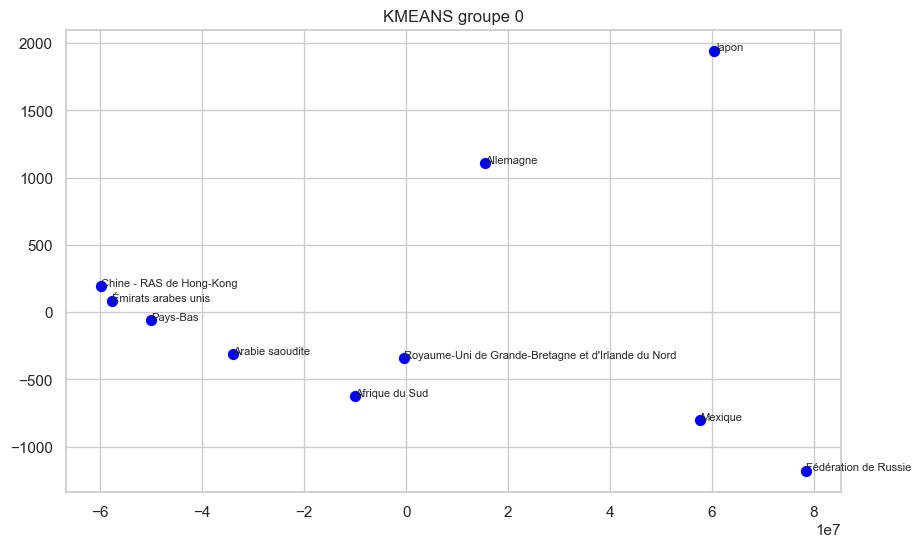

In [101]:
# Graphique nuage de point pour les pays du groupe 0
df_cluster0 = df.loc[pays_cluster0_KM]
pca = PCA(n_components=2)
X_projected = pca.fit_transform(df_cluster0)
plt.figure(figsize=(10, 6))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c='blue', marker='o', s=50, label='Cluster 2')
for i, pays in enumerate(df_cluster0.index):
    plt.annotate(pays, (X_projected[i, 0], X_projected[i, 1]), fontsize=8)
plt.title('KMEANS groupe 0')
plt.grid(True)
plt.show()

### 7. CONCLUSION

In [102]:
df_cluster0

,Dispo al Kcal/per/j,Dispo al kg/per/an,Dispo mat grass g/per/j,Dispo pro g/per/j,Dispo intér T,Expor T,Impor T,Nourriture,Production,Nombre Habitant,Evolution_pop %,Balance commerciale,clusters_km
Pays,,,,,,,,,,,,,
Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0,57009756,1.43,-451.0,0
Allemagne,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0,82658409,0.57,-196.0,0
Arabie saoudite,151.0,43.36,9.38,15.57,1435.0,10.0,722.0,1435.0,616.0,33101178,2.03,-712.0,0
Chine - RAS de Hong-Kong,210.0,53.51,12.70,22.26,280.0,663.0,907.0,391.0,24.0,7306322,0.87,-244.0,0
Émirats arabes unis,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,48.0,9487203,1.35,-339.0,0
Fédération de Russie,104.0,30.98,6.55,10.44,4556.0,115.0,226.0,4509.0,4444.0,145530082,0.18,-111.0,0
Japon,67.0,18.50,3.95,7.24,2415.0,10.0,1069.0,2359.0,2215.0,127502725,-0.20,-1059.0,0
Mexique,123.0,32.52,9.27,9.26,4219.0,9.0,972.0,4058.0,3249.0,124777324,1.17,-963.0,0
Pays-Bas,70.0,20.33,3.74,8.48,372.0,1418.0,608.0,346.0,1100.0,17021347,0.24,810.0,0


#### Voici la liste  des pays qui ont été sélectionnés pour l'exportation : 

- Afrique du Sud 
- Allemagne
- Arabie saoudite 
- Chine - RAS de Hong-Kong
- Émirats arabes unis
- Fédération de Russie
- Japon
- Mexique
- Pays-Bas
- Royaume-Uni de Grande-Bretagne et d'Irlande du Nord

Le groupe correspond aux critères de selection.

Les pays Européens seront à privilégier, les accords commerciaux de l'UE, peuvent simplifier les procédures d'exportation et réduire les barrières tarifaires. De plus, les pays européens sont connectés par des réseaux de transport efficaces, ce qui facilite la logistique et la distribution des produits.
 
Cette liste sera affinée avec les équipes métiers